In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [17]:
data = pd.read_csv('income.csv')
data

,ID,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398
...,...,...,...
493,494,5.249209,4.568705
494,495,3.471799,2.535002
495,496,6.087610,4.397451
496,497,3.440847,2.070664


In [18]:
data.isna().sum()

ID           0
income       0
happiness    0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         498 non-null    int64  
 1   income     498 non-null    float64
 2   happiness  498 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [20]:
data.describe()

,ID,income,happiness
count,498.000000,498.000000,498.000000
mean,249.500000,4.466902,3.392859
std,143.904482,1.737527,1.432813
min,1.000000,1.506275,0.266044
25%,125.250000,3.006256,2.265864
50%,249.500000,4.423710,3.472536
75%,373.750000,5.991913,4.502621
max,498.000000,7.481521,6.863388


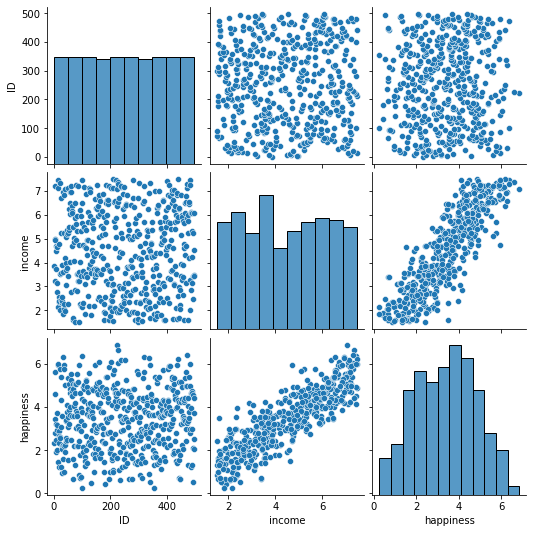

In [21]:
sn.pairplot(data)

<AxesSubplot:>

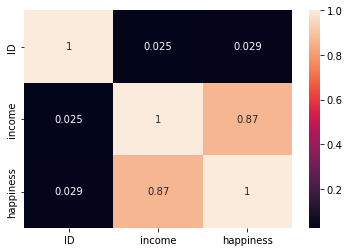

In [22]:
sn.heatmap(data.corr(),annot=True)

In [26]:
x= data['income'].to_numpy().reshape(-1,1)
y = data['happiness'].to_numpy().reshape(-1,1)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=123)
x_train.shape

(373, 1)

In [28]:
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [30]:
model.intercept_

array([0.15941574])

In [31]:
model.coef_

array([[0.7212061]])

In [32]:
y_pred = model.predict(x_test)
y_pred

array([[5.28833321],
       [2.73729022],
       [2.14802507],
       [4.82967612],
       [4.30991426],
       [2.84925735],
       [3.25482054],
       [4.4520358 ],
       [5.42487129],
       [4.4899131 ],
       [1.77716296],
       [2.61194698],
       [4.8339974 ],
       [2.15944926],
       [2.69824525],
       [1.86110714],
       [2.03602077],
       [5.29404641],
       [2.77904066],
       [1.30419724],
       [4.90105375],
       [3.77612704],
       [3.22012249],
       [5.28114708],
       [3.42892798],
       [5.32460211],
       [2.47038822],
       [1.65274644],
       [1.99441477],
       [5.42257753],
       [1.49824236],
       [4.44319353],
       [1.24575048],
       [3.9995732 ],
       [1.80845015],
       [3.31968552],
       [5.08271322],
       [5.15012079],
       [3.54900929],
       [3.50575031],
       [2.41428393],
       [2.97048808],
       [5.38581949],
       [4.48275944],
       [4.10054748],
       [2.48270445],
       [3.92930513],
       [5.155

In [37]:
income = float(input("Enter an income to predict happiness: "))
testdata = np.array(income).reshape(-1,1)      # convert to suitable form
print (model.predict(testdata))

Enter an income to predict happiness: 50
[[36.21972051]]


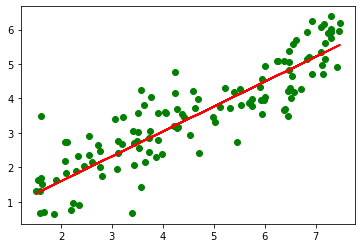

In [39]:
plt.scatter(x_test,y_test,color='g')
plt.plot(x_test,y_pred,color='r')

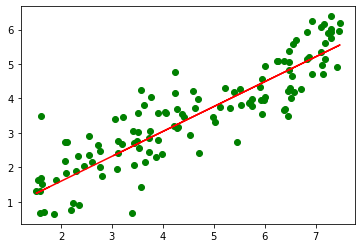

In [40]:
plt.scatter(x_test,y_test,color='g')
plt.plot(x_train,0.15941574+0.7212061*x_train,color='r')

In [41]:
model.score(x_test,y_test)

0.7814020139653783

In [46]:
mean_squared_error(y_test,y_pred)

0.4457231507402961

In [43]:
mean_absolute_error(y_test,y_pred)

0.5318679730269632

In [44]:
sqrt(mean_squared_error(y_test,y_pred))

0.6676250075755822